We start by mounting the google drive folder and by importing the necessary packages that will be needed for the analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
import os
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data analysis

In this section we will try to explore the dataset and understand the main characteristics of it. Besides that, we will try different type of normalization/standardization to see how do they perform using the two types of classifies requires: a SVM and a Random Forest

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine learning/mldata_0003145700.csv") 

##Preparation of the dataset

Now we will proceed by dividing the column of the labels by the rest of the dataset, obtaining a 'X' dataset where we only the features will be present ( so a 1000x25 dataset) and a 'y' dataset which will only contain the labels( 1000x1)

In [ ]:
labels = []
for j in list(df['label']):
  labels.append(j)

In [ ]:
X = df.to_numpy()
X_t = np.transpose(X)

In [ ]:
df_new = pd.DataFrame(X)

In [ ]:
df_new["Classification"] = labels

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_new.iloc[:,:-1]
y = df_new["Classification"]

#for j in range(len(y)):
  #y[j] = y[j] - 1

In [ ]:
X.drop([0,1], axis=1, inplace = True)

In [ ]:
X

,2,3,4,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,24,25,26
0,1.439772,2.900153,1.655712,5.555988,4.254662,0.353176,-0.997819,-4.376887,-2.352846,1.608303,...,7.080693,-0.341032,1.435734,3.144013,-2.627530,5.517825,1.067400,-0.341032,-0.109583,3.002469
1,1.986088,2.324862,0.007829,-0.871718,0.916969,0.829898,-0.842456,-1.092335,2.708258,-0.129414,...,4.728423,2.962266,2.177634,-1.733924,0.450930,-2.830187,-0.134295,2.962266,3.254962,-0.339254
2,0.336269,3.004613,-1.930875,1.439394,-0.697618,-1.001274,-0.259889,5.525994,4.856763,-0.412895,...,1.480461,-0.567486,2.470256,-1.329089,4.975457,-2.585726,-1.837298,-0.567486,-1.946211,-1.253788
3,2.071229,-1.498163,0.440641,-1.152636,0.048734,0.405282,-0.932025,0.874657,1.779282,-0.826324,...,2.942304,1.701071,-1.995232,-1.657481,-4.598896,-3.433598,3.623646,1.701071,-5.552626,-0.950720
4,1.043075,-2.732194,-0.431437,-2.632375,1.771509,-0.829871,0.076662,-4.942676,-2.286479,-0.905626,...,2.583387,-1.108800,1.208563,2.278611,2.748028,-1.753767,-3.094496,-1.108800,-3.736318,-1.926333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.089759,2.817556,-0.966959,-0.398322,0.154007,-0.239762,0.606952,4.878645,2.087532,-1.670738,...,1.477869,-0.032065,2.584277,1.930307,3.179632,-3.611677,-3.136258,-0.032065,-0.277431,0.381195
996,1.041610,2.344646,0.664402,-1.009524,-1.161369,0.360433,0.264706,1.731802,3.195816,-0.000629,...,-0.357744,1.413152,-0.075973,0.234479,2.126294,-0.772657,-0.000333,1.413152,0.905818,0.280902
997,0.568127,3.649468,-0.081165,3.741022,-4.854481,-1.367439,-0.361935,2.246907,2.504914,-0.177278,...,-2.454542,-2.254115,2.484322,-2.502223,-2.745562,0.976327,-1.560933,-2.254115,-2.167072,1.092504
998,0.271102,2.132589,-0.239577,-3.526276,-2.096226,0.922163,-0.212503,-2.241308,-0.622904,-0.649418,...,4.534965,2.203527,-0.929240,-1.905128,0.202168,-1.629848,-0.014998,2.203527,3.710004,-2.963292


In [ ]:
y

0      0
1      1
2      1
3      0
4      2
      ..
995    1
996    1
997    1
998    1
999    1
Name: Classification, Length: 1000, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalization, Scaling

We will modify our data by 2 different methods. Let's start with scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = sklearn.preprocessing.StandardScaler().fit(X)

In [ ]:
X_scal= scaler.transform(X)

In [ ]:
x_train_scal, x_test_scal, y_train_scal, y_test_scal = train_test_split(X_scal, y, test_size=0.2, random_state=42)

Let's now proceed with a normalization.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
X_norm=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 


In [ ]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)

## Data Visualization

After having explored, understood and scaled the data in two different ways, let's plot a histogram of our data 

In [ ]:
kappa = df.iloc[:,3]

In [ ]:
X.describe()

,2,3,4,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,24,25,26
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.124799,0.748690,0.129658,-0.007761,0.123252,0.069722,0.070199,-0.009884,0.079186,0.080215,...,0.204622,-0.202467,0.043665,-0.106123,0.680196,0.065799,-0.377469,-0.202467,-0.086059,0.581100
std,0.999187,2.597330,0.991960,2.647237,2.536342,0.987006,1.022426,2.692313,2.575938,1.006489,...,2.535721,2.547494,2.532803,2.600991,2.423829,2.469982,2.695279,2.547494,2.526756,2.549374
min,-3.134048,-9.159798,-3.319151,-8.815919,-8.054373,-3.177392,-2.747448,-9.154715,-8.580321,-3.058446,...,-9.828833,-9.880813,-9.496499,-7.543769,-7.244143,-10.250223,-9.761597,-9.880813,-10.762157,-7.272390
25%,-0.566658,-1.044913,-0.526321,-1.640560,-1.582914,-0.594002,-0.643528,-1.826766,-1.568891,-0.607405,...,-1.442312,-1.872914,-1.632763,-1.938589,-0.866745,-1.702992,-2.190238,-1.872914,-1.756374,-1.258140
50%,0.137866,0.727298,0.092376,0.046683,0.221377,0.102147,0.045848,-0.028521,0.176523,0.057772,...,0.239183,-0.149612,0.037179,-0.200399,0.652633,0.072198,-0.469066,-0.149612,-0.034255,0.535044
75%,0.796384,2.497990,0.806600,1.661088,1.845575,0.736828,0.776289,1.740482,1.820019,0.750791,...,1.926541,1.371716,1.767968,1.648789,2.284129,1.706788,1.466075,1.371716,1.718431,2.296921
max,2.800316,10.725429,2.774936,7.920094,9.012336,3.058529,3.362973,9.293829,7.885047,3.605437,...,7.788832,9.159507,10.718168,9.217559,9.527020,8.609580,8.735718,9.159507,7.942619,9.017686


In [ ]:
X.describe().iloc[1,:].mean()

0.07779292916810801

we see that our data has a mean value of 0.077

(array([  2.,   5.,  51., 177., 275., 274., 160.,  42.,  12.,   2.]),
 array([-9.1597976 , -7.17127497, -5.18275234, -3.19422971, -1.20570708,
         0.78281555,  2.77133818,  4.75986082,  6.74838345,  8.73690608,
        10.72542871]),
 <a list of 10 Patch objects>)

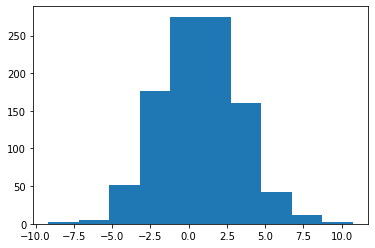

In [ ]:
plt.hist(kappa)

We plot the histogram and we see that our data points follows a normal distribution. We can assume that our datapoints were generated using in fact a normal distribution centered at 0. 

##Dimensionality Reduction

###PCA

In [ ]:
from sklearn.decomposition import PCA

First, let's create 3 lists that will contain respectively the indices of the datapoint having the label 0, 1 or 2.

In [ ]:
l_0= []
l_1 = []
l_2= []

In [ ]:
for i in range(1000):
  if df['label'][i] == 0:
    l_0.append(i)
  if df['label'][i] == 1:
    l_1.append(i)
  if df['label'][i] == 2:
    l_2.append(i)

Let's take the first two PC and plot the data to see if we can deduce something from the plot.

In [ ]:
pca2D = PCA(n_components = 2)
data_red2D = pca2D.fit_transform(X)

In [ ]:
pca2D.explained_variance_ratio_

array([0.11813549, 0.08959736])

The first 2 PC expalines just around 20% of the variance... not that much. Let's see if the plot helps.

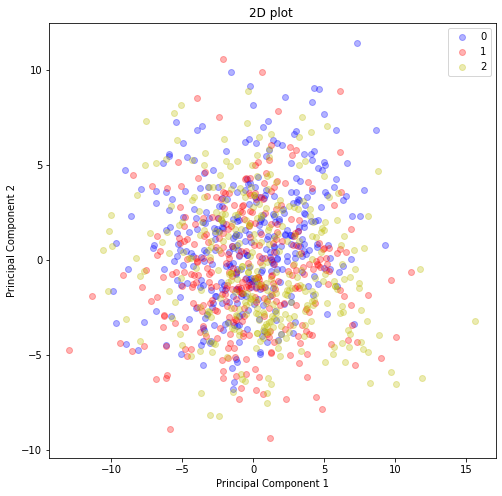

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D plot ')

ax.scatter(data_red2D[l_0,0],data_red2D[l_0,1],c="b",alpha = 0.3, label="0")
ax.scatter(data_red2D[l_1,0],data_red2D[l_1,1] ,c="r",alpha = 0.3, label="1")
ax.scatter(data_red2D[l_2,0],data_red2D[l_2,1], c="y",alpha = 0.3, label="2")
ax.legend()
plt.show()

The 2d plot does not really help actually. Let's see if in 3D we can draw better conclusions

Let's take the first 3 principal components. In this way we will try to see if we can identify 3 clear clusters or not.

In [ ]:
pca3D = PCA(n_components = 3)
data_red = pca3D.fit_transform(X)
pca3D.n_components_

3

In [ ]:
pca3D.explained_variance_ratio_

array([0.11813396, 0.08959197, 0.08722025])

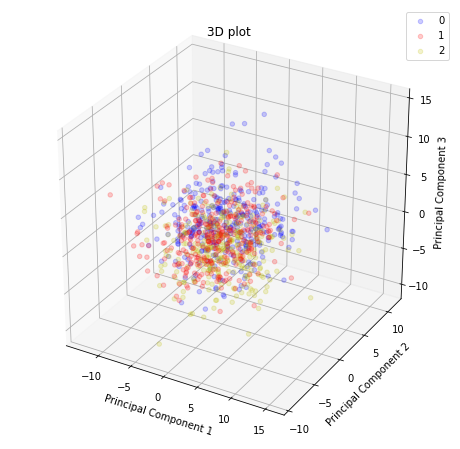

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D plot ')

ax.scatter(data_red[l_0,0],data_red[l_0,1], data_red[l_0,2],c="b",alpha = 0.2, label="0")
ax.scatter(data_red[l_1,0],data_red[l_1,1], data_red[l_1,2] ,c="r",alpha = 0.2, label="1")
ax.scatter(data_red[l_2,0],data_red[l_2,1], data_red[l_2,2], c="y",alpha = 0.2, label="2")
ax.legend()
plt.show()

Let's now build a 3d version to better explore the plot

In [ ]:
plot_df = pd.DataFrame(data_red)
plot_df.columns = ["PC1","PC2","PC3"]

aux = []

for i in range(1000):
  if df['label'][i] == 0:
    aux.append(0)
  if df['label'][i] == 1:
    aux.append(1)
  if df['label'][i] == 2:
    aux.append(2)

plot_df["Color"] = aux
plot_df

,PC1,PC2,PC3,Color
0,1.055989,1.296183,2.080063,0
1,-4.632717,0.073295,-2.769144,1
2,0.297175,-0.863719,1.277126,1
3,-1.371906,3.954493,2.988666,0
4,1.132690,5.439823,-2.082415,2
...,...,...,...,...
995,0.197518,-1.475133,-0.528858,1
996,-3.008098,-0.639644,0.045471,1
997,2.569923,-5.016271,6.450628,1
998,-3.003586,0.008228,-4.078644,1


In [ ]:
!pip install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

fig = px.scatter_3d(
    data_frame = plot_df,
    x = "PC1",
    y = "PC2",
    z = "PC3",
    color = "Color",
    title = "Interactive PCA plot with supervised labels",
)

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 7.1 MB/s 
     |████████████████████████████████| 357 kB 45.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=3640331c041836f824129e806263752528e2e68961aae000dab32e255fb57f75
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import sys


<IPython.core.display.Javascript object>

Neither the 3D graph is giving us better insights on the structure of the dataset. Let's try to apply t-SNE instead

### t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity = 60).fit_transform(data_red)

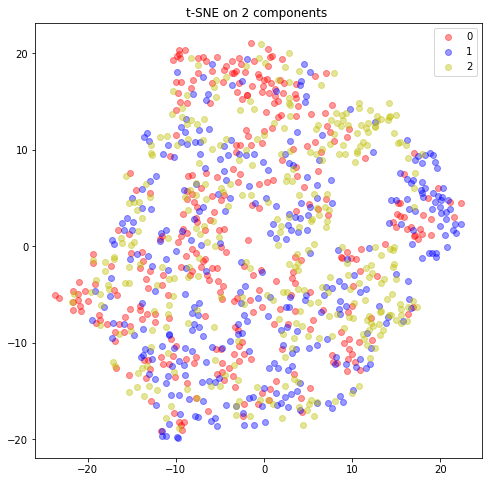

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(embedded[l_0,0], embedded[l_0,1], c="r",alpha = 0.4, label="0")
ax.scatter(embedded[l_1,0], embedded[l_1,1], c="b",alpha = 0.4, label="1")
ax.scatter(embedded[l_2,0], embedded[l_2,1], c="y",alpha = 0.4, label="2")
ax.set_title('t-SNE on 2 components ')
ax.legend()

plt.show()

Neither t-SNE gives a better insight. 

We conclude here our part of data analysis. We prepared the data set, creating a column containing just the label. Then we normalized and scaled the data using two different techniques. After seeing that our datapoints follow a normal distribution, we try to visualize them using two different dimensionality reduction techquines: they do not give a great insigth on the ' division of the data'. We'll now pass to the part of the classifier, trying to predict the labels. 

#CLASSIFIER

Now, we try to make a prediction for the label of the data. We implement a SVM and a Random Forest classifier on the normalized, the scaled and the original dataset. 

## SVM

### Linear SVM on the 3 different datasets

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

Let's first, as asked, to implement a SVM using LinearSVC.

In [ ]:
svm = sklearn.svm.LinearSVC(penalty = 'l2', 
                            loss='squared_hinge',
                            dual = False,  
                            C=0.1, 
                            fit_intercept=True,
                            class_weight = 'balanced',
                            max_iter = 100000)

In [ ]:
svm.fit(x_train, y_train)

LinearSVC(C=0.1, class_weight='balanced', dual=False, max_iter=100000)

In [ ]:
lol = svm.predict(x_train)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, lol))

Accuracy: 0.69


Let's try to predict the original x_test

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7


Let's now try for the normalized set

In [ ]:
svm = sklearn.svm.LinearSVC(penalty = 'l2', 
                            loss='squared_hinge',
                            dual = False,  
                            C=0.1, 
                            fit_intercept=True,
                            class_weight = 'balanced',
                            max_iter = 100000)

In [ ]:
svm.fit(x_train_norm, y_train_norm)

LinearSVC(C=0.1, class_weight='balanced', dual=False, max_iter=100000)

In [ ]:
lol = svm.predict(x_train_norm)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train_norm, lol))

Accuracy: 0.67625


In [ ]:
y_pred = svm.predict(x_test_norm)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred))

Accuracy: 0.69


Now is the turn of the scaled set

In [ ]:
svm = sklearn.svm.LinearSVC(penalty = 'l2', 
                            loss='squared_hinge',
                            dual = False,  
                            C=0.1, 
                            fit_intercept=True,
                            class_weight = 'balanced',
                            max_iter = 100000)

In [ ]:
svm.fit(x_train_scal, y_train_scal)

LinearSVC(C=0.1, class_weight='balanced', dual=False, max_iter=100000)

In [ ]:
lol = svm.predict(x_train_scal)

print("Accuracy:",metrics.accuracy_score(y_train_scal, lol))

Accuracy: 0.6925


In [ ]:
y_pred = svm.predict(x_test_scal)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_scal, y_pred))

Accuracy: 0.7


For all the 3 dataset we see that we do not obtain a different prediction among the 3. Let's see if now, tuning the parameters with GridSearch we can increase our accuracy on any of the datasets taken in consideration. For the sake of simplicity, we will optimize just on the original dataset. After that, we see if the optimized values actually lead to an increase in accuracy in the normalized or in the scaled dataset

### Tuning parameters for Linear SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = sklearn.svm.LinearSVC(penalty = 'l2', 
                            loss='squared_hinge',
                            dual = False,  
                            C=0.1, 
                            fit_intercept=True,
                            class_weight = 'balanced',
                            random_state = 31)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_grid = {"C": [0.1,1,2,10,100,1000], 'loss':['squared_hinge', 'hinge'], 
                      'fit_intercept':['True', 'False'] }


In [ ]:
grid = GridSearchCV(sklearn.svm.LinearSVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......C=0.1, fit_intercept=True, loss=squared_hinge; total time=   0.1s
[CV] END ......C=0.1, fit_intercept=True, loss=squared_hinge; total time=   0.1s
[CV] END ......C=0.1, fit_intercept=True, loss=squared_hinge; total time=   0.1s
[CV] END ......C=0.1, fit_intercept=True, loss=squared_hinge; total time=   0.1s
[CV] END ......C=0.1, fit_intercept=True, loss=squared_hinge; total time=   0.1s
[CV] END ..............C=0.1, fit_intercept=True, loss=hinge; total time=   0.0s
[CV] END ..............C=0.1, fit_intercept=True, loss=hinge; total time=   0.0s
[CV] END ..............C=0.1, fit_intercept=True, loss=hinge; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..............C=0.1, fit_intercept=True, loss=hinge; total time=   0.0s
[CV] END ..............C=0.1, fit_intercept=True, loss=hinge; total time=   0.0s
[CV] END .....C=0.1, fit_intercept=False, loss=squared_hinge; total time=   0.1s
[CV] END .....C=0.1, fit_intercept=False, loss=squared_hinge; total time=   0.1s
[CV] END .....C=0.1, fit_intercept=False, loss=squared_hinge; total time=   0.1s
[CV] END .....C=0.1, fit_intercept=False, loss=squared_hinge; total time=   0.1s
[CV] END .....C=0.1, fit_intercept=False, loss=squared_hinge; total time=   0.1s
[CV] END .............C=0.1, fit_intercept=False, loss=hinge; total time=   0.0s
[CV] END .............C=0.1, fit_intercept=False, loss=hinge; total time=   0.0s
[CV] END .............C=0.1, fit_intercept=False, loss=hinge; total time=   0.0s
[CV] END .............C=0.1, fit_intercept=False, loss=hinge; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .............C=0.1, fit_intercept=False, loss=hinge; total time=   0.0s
[CV] END ........C=1, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ........C=1, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END ........C=1, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ........C=1, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END ........C=1, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ................C=1, fit_intercept=True, loss=hinge; total time=   0.1s
[CV] END ................C=1, fit_intercept=True, loss=hinge; total time=   0.1s
[CV] END ................C=1, fit_intercept=True, loss=hinge; total time=   0.1s
[CV] END ................C=1, fit_intercept=True, loss=hinge; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ................C=1, fit_intercept=True, loss=hinge; total time=   0.1s
[CV] END .......C=1, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .......C=1, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END .......C=1, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .......C=1, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END .......C=1, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...............C=1, fit_intercept=False, loss=hinge; total time=   0.1s
[CV] END ...............C=1, fit_intercept=False, loss=hinge; total time=   0.1s
[CV] END ...............C=1, fit_intercept=False, loss=hinge; total time=   0.1s
[CV] END ...............C=1, fit_intercept=False, loss=hinge; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...............C=1, fit_intercept=False, loss=hinge; total time=   0.1s
[CV] END ........C=2, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ........C=2, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END ........C=2, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ........C=2, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END ........C=2, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ................C=2, fit_intercept=True, loss=hinge; total time=   0.1s
[CV] END ................C=2, fit_intercept=True, loss=hinge; total time=   0.1s
[CV] END ................C=2, fit_intercept=True, loss=hinge; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ................C=2, fit_intercept=True, loss=hinge; total time=   0.1s
[CV] END ................C=2, fit_intercept=True, loss=hinge; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .......C=2, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END .......C=2, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .......C=2, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END .......C=2, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .......C=2, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END ...............C=2, fit_intercept=False, loss=hinge; total time=   0.1s
[CV] END ...............C=2, fit_intercept=False, loss=hinge; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...............C=2, fit_intercept=False, loss=hinge; total time=   0.1s
[CV] END ...............C=2, fit_intercept=False, loss=hinge; total time=   0.1s
[CV] END ...............C=2, fit_intercept=False, loss=hinge; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .......C=10, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END .......C=10, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .......C=10, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END .......C=10, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .......C=10, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END ...............C=10, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...............C=10, fit_intercept=True, loss=hinge; total time=   0.2s
[CV] END ...............C=10, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...............C=10, fit_intercept=True, loss=hinge; total time=   0.2s
[CV] END ...............C=10, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ......C=10, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END ......C=10, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ......C=10, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END ......C=10, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ......C=10, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END ..............C=10, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..............C=10, fit_intercept=False, loss=hinge; total time=   0.2s
[CV] END ..............C=10, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..............C=10, fit_intercept=False, loss=hinge; total time=   0.2s
[CV] END ..............C=10, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ......C=100, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END ......C=100, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ......C=100, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END ......C=100, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ......C=100, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END ..............C=100, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..............C=100, fit_intercept=True, loss=hinge; total time=   0.2s
[CV] END ..............C=100, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..............C=100, fit_intercept=True, loss=hinge; total time=   0.2s
[CV] END ..............C=100, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .....C=100, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END .....C=100, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .....C=100, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END .....C=100, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .....C=100, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END .............C=100, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .............C=100, fit_intercept=False, loss=hinge; total time=   0.2s
[CV] END .............C=100, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .............C=100, fit_intercept=False, loss=hinge; total time=   0.2s
[CV] END .............C=100, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .....C=1000, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END .....C=1000, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .....C=1000, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END .....C=1000, fit_intercept=True, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .....C=1000, fit_intercept=True, loss=squared_hinge; total time=   0.2s
[CV] END .............C=1000, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .............C=1000, fit_intercept=True, loss=hinge; total time=   0.2s
[CV] END .............C=1000, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END .............C=1000, fit_intercept=True, loss=hinge; total time=   0.2s
[CV] END .............C=1000, fit_intercept=True, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ....C=1000, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END ....C=1000, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ....C=1000, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END ....C=1000, fit_intercept=False, loss=squared_hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ....C=1000, fit_intercept=False, loss=squared_hinge; total time=   0.2s
[CV] END ............C=1000, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ............C=1000, fit_intercept=False, loss=hinge; total time=   0.2s
[CV] END ............C=1000, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ............C=1000, fit_intercept=False, loss=hinge; total time=   0.2s
[CV] END ............C=1000, fit_intercept=False, loss=hinge; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 2, 10, 100, 1000],
                         'fit_intercept': ['True', 'False'],
                         'loss': ['squared_hinge', 'hinge']},
             verbose=2)

In [ ]:
grid.best_params_

{'C': 1, 'fit_intercept': 'False', 'loss': 'squared_hinge'}

In [ ]:
svm = sklearn.svm.LinearSVC(penalty = 'l2', 
                            loss='squared_hinge',
                            dual = True,  
                            C=1, 
                            fit_intercept=False,
                            class_weight = 'balanced')

In [ ]:
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.705


In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)


[[45 15  8]
 [10 43 13]
 [ 3 10 53]]


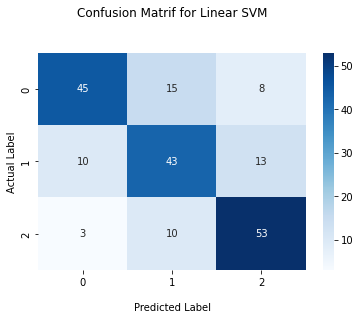

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrif for Linear SVM\n\n');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label');

ax.xaxis.set_ticklabels(['0','1', '2'])
ax.yaxis.set_ticklabels(['0','1', '2'])

##  visualization of the Confusion Matrix.
plt.show()

Here we have plotted our confusion matrix for our linear SVM

We got a slightly increase in the accuracy thanks to the parameters found by GridSearch. Let's see if implementing a SVM with different kernels, through a Randomized Grid Search helps to increase our accuracy 

###SVM with different Kernels on the 3 datasets

Let's now implement SVM leaving free also the choice for the kernels. We start from the default case

In [ ]:
svm_clf = SVC(gamma="scale",random_state = 42)

Let's see how it performs on the original dataset

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [ ]:
from sklearn.utils.fixes import loguniform

In [ ]:
svm_clf.fit(x_train, y_train)

y_pred = svm_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.85

Let's do it for the normalized dataset

In [ ]:
svm_clf = SVC(gamma="scale", random_state = 41)

In [ ]:
svm_clf.fit(x_train_norm, y_train_norm)

y_pred = svm_clf.predict(x_test_norm)
accuracy_score(y_test_norm, y_pred)

0.77

Now is the turn of the scaled one

In [ ]:
svm_clf = SVC(gamma="scale", random_state = 40)

In [ ]:
svm_clf.fit(x_train_scal, y_train_scal)

y_pred = svm_clf.predict(x_test_scal)
accuracy_score(y_test_scal, y_pred)

0.785

We obtain a better perfomance on the original dataset. Let's see if on it we can increase our performance through a randomized grid search

### Tuning Parameters for SVM

In [ ]:
svm_cl = SVC(gamma="scale")

In [ ]:
param_distributions = {"gamma": reciprocal(0.001, 1), 
                       "C": uniform(0.1, 100)}
rnd_search_cv = RandomizedSearchCV(svm_cl, param_distributions, n_iter=5000, verbose=1, cv=5)
rnd_search_cv.fit(x_train, y_train)

In [ ]:
rnd_search_cv.best_estimator_.fit(x_train, y_train)


SVC(C=22.589811271799878, gamma=0.020242130426907784)

In [ ]:
rnd_search_cv.best_params_

{'C': 22.589811271799878, 'gamma': 0.020242130426907784}

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(x_test)
accuracy_score(y_test, y_pred)

0.88

The one below is the SVM I constructed using the best set of estiamators among various tries of Randomized Grid Search.

In [ ]:
sv_fin = SVC ( C =22.589811271799878, gamma= 0.020242130426907784, random_state = 42 )

In [ ]:
sv_fin.fit(x_train, y_train)

SVC(C=22.589811271799878, gamma=0.020242130426907784, random_state=42)

In [ ]:
y_pred = sv_fin.predict(x_test)
accuracy_score(y_test, y_pred)


0.885

Now let's plot again the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)


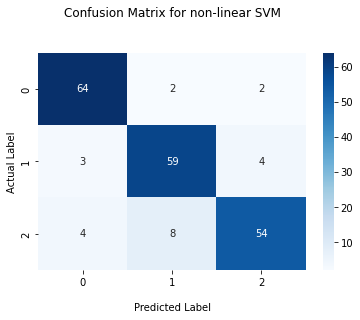

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for non-linear SVM\n\n');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label');

ax.xaxis.set_ticklabels(['0','1', '2'])
ax.yaxis.set_ticklabels(['0','1', '2'])

##  visualization of the Confusion Matrix.
plt.show()

We see that it is waaay better than the previous confusion matrix!



Great! We got an increase of around 4% in accuracy. Our RandomizedGridSearch worked well. Choosing the parameters, I decided to take a trade-off. The number of iteration is not too small,but neither very high. I tried to optimize the most important parameters taking the running time in consideration. For example, I have decided not to include the linear kernel now. This is beacuse each iterations requires almost 10 seconds using this kernel, while for the others the computations are immediate. Moreover, the Radial Basis Function Kernel works usually way better, so I prefered to save some running time on the choice of the kernel to increase the number of iteration and having a broader exploration of the possible parameters

## Random Forest

We now go to a Random Forest classifier. 

### Random forest on the 3 datasets

In [ ]:
from pandas.core.arrays.categorical import recode_for_categories
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=42, n_jobs=-1,
                                       n_estimators=100)

rfc.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.725

Let's do it on the scaled dataset

In [ ]:
rfc= RandomForestClassifier(random_state=42, n_jobs=-1,
                                       n_estimators=100)

In [ ]:
rfc.fit(x_train_scal,y_train_scal)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred = rfc.predict(x_test_scal)

In [ ]:
accuracy_score(y_pred, y_test_scal)

0.725

And now let's pass to the normalized one

In [ ]:
rfc= RandomForestClassifier(random_state=42, n_jobs=-1,
                                       n_estimators=100)

In [ ]:
rfc.fit(x_train_norm,y_train_norm)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred = rfc.predict(x_test_norm)

In [ ]:
accuracy_score(y_pred, y_test_norm)

0.725

We got the same accuracy on all the datasets , so let's tune the parameters on the original one for convenience

### Tuning parameters of Random Forest

In [ ]:
rf= RandomForestClassifier(random_state=40)

In [ ]:
params = {
    'max_depth': [10,20, None],
    'criterion': ["gini", "entropy"],
    'n_estimators': [1000,1200,1400]
}

In [ ]:
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, 
                           scoring="accuracy")


In [ ]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'n_estimators': [1000, 1200, 1400]},
             scoring='accuracy', verbose=1)

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred = rf_best.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.765

Now let's try to tune the parameters with a Randomized Grid Search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=12, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=12, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [ ]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=1400)

In [ ]:

best_random.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=1400)

In [ ]:
y_pred = best_random.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.785

Great! Starting from a 72% accuracy, we got a 77% using a GridSearch. Trying again a RandomizedGridSearch, we furtherly increased our accuracy to 78.5%. We can actually see that then our tuning of the parameters is actually working.

Let's plot the accuracy against the number of estimators

In [ ]:
train_accuracy = []
test_accuracy = []

for i in range(100, 201, 10):
  rf = RandomForestClassifier(n_estimators=10*i, 
                                     random_state= 12,
                                     n_jobs = -1 )
  rf.fit(x_train, y_train)

  train_accuracy.append(rf.score(x_train, y_train))
  test_accuracy.append(rf.score(x_test, y_test))

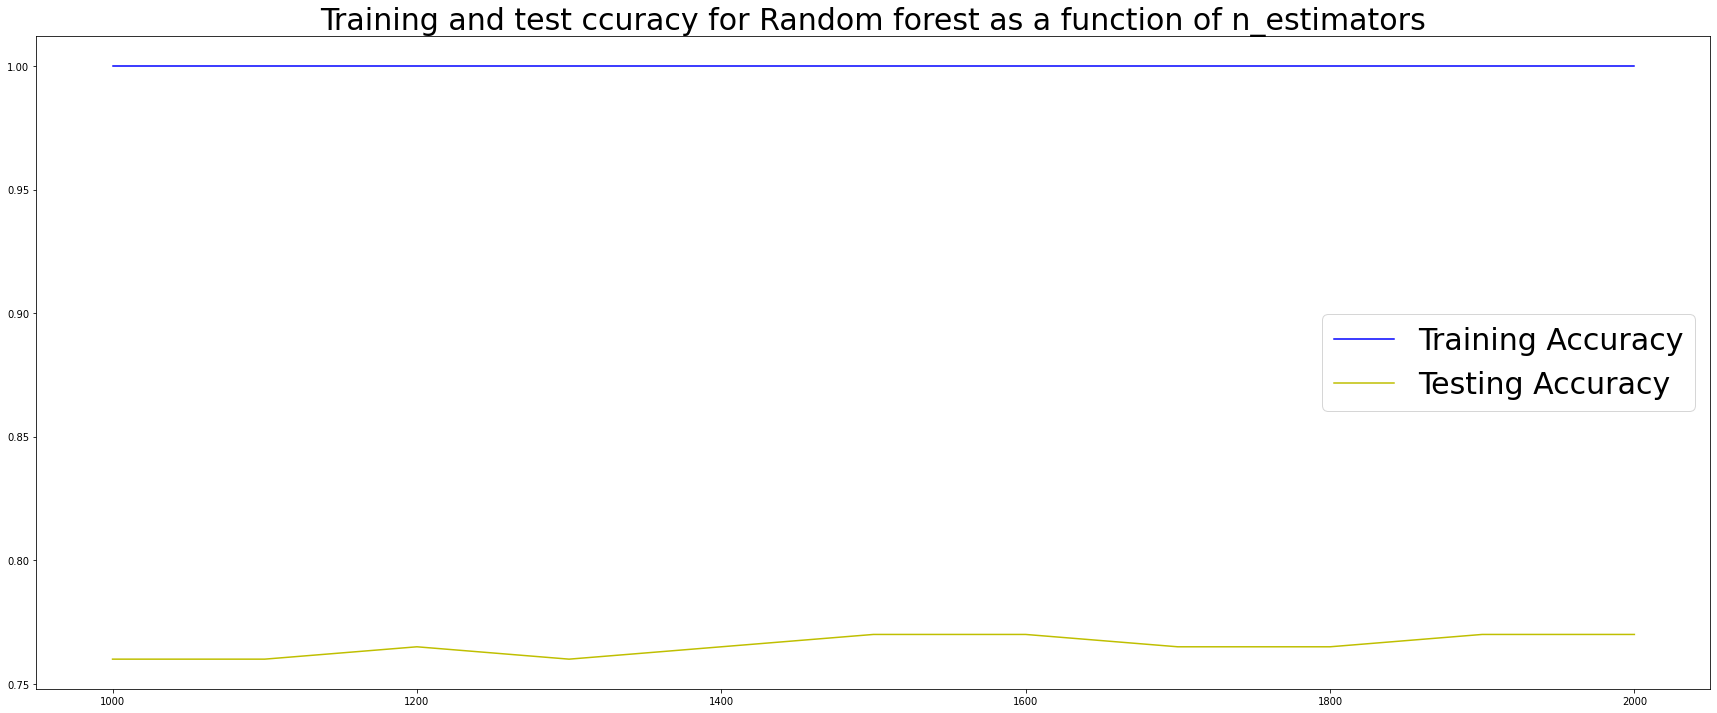

In [ ]:
x = np.arange(1000, 2001, 100)

fig = plt.figure(figsize = (30,12))
ax = fig.add_subplot()

plt.plot(x, train_accuracy, color = 'b', label= "Training Accuracy")
plt.plot(x, test_accuracy, color = 'y', label = "Testing Accuracy")

ax.set_title('Training and test ccuracy for Random forest as a function of n_estimators', fontsize = 30)
ax.legend(fontsize=30)

Here we see that our accuracy oscillates between the number of estimators, while our randomized grid search got 1400 as the best number of estimators. We will stick to it.

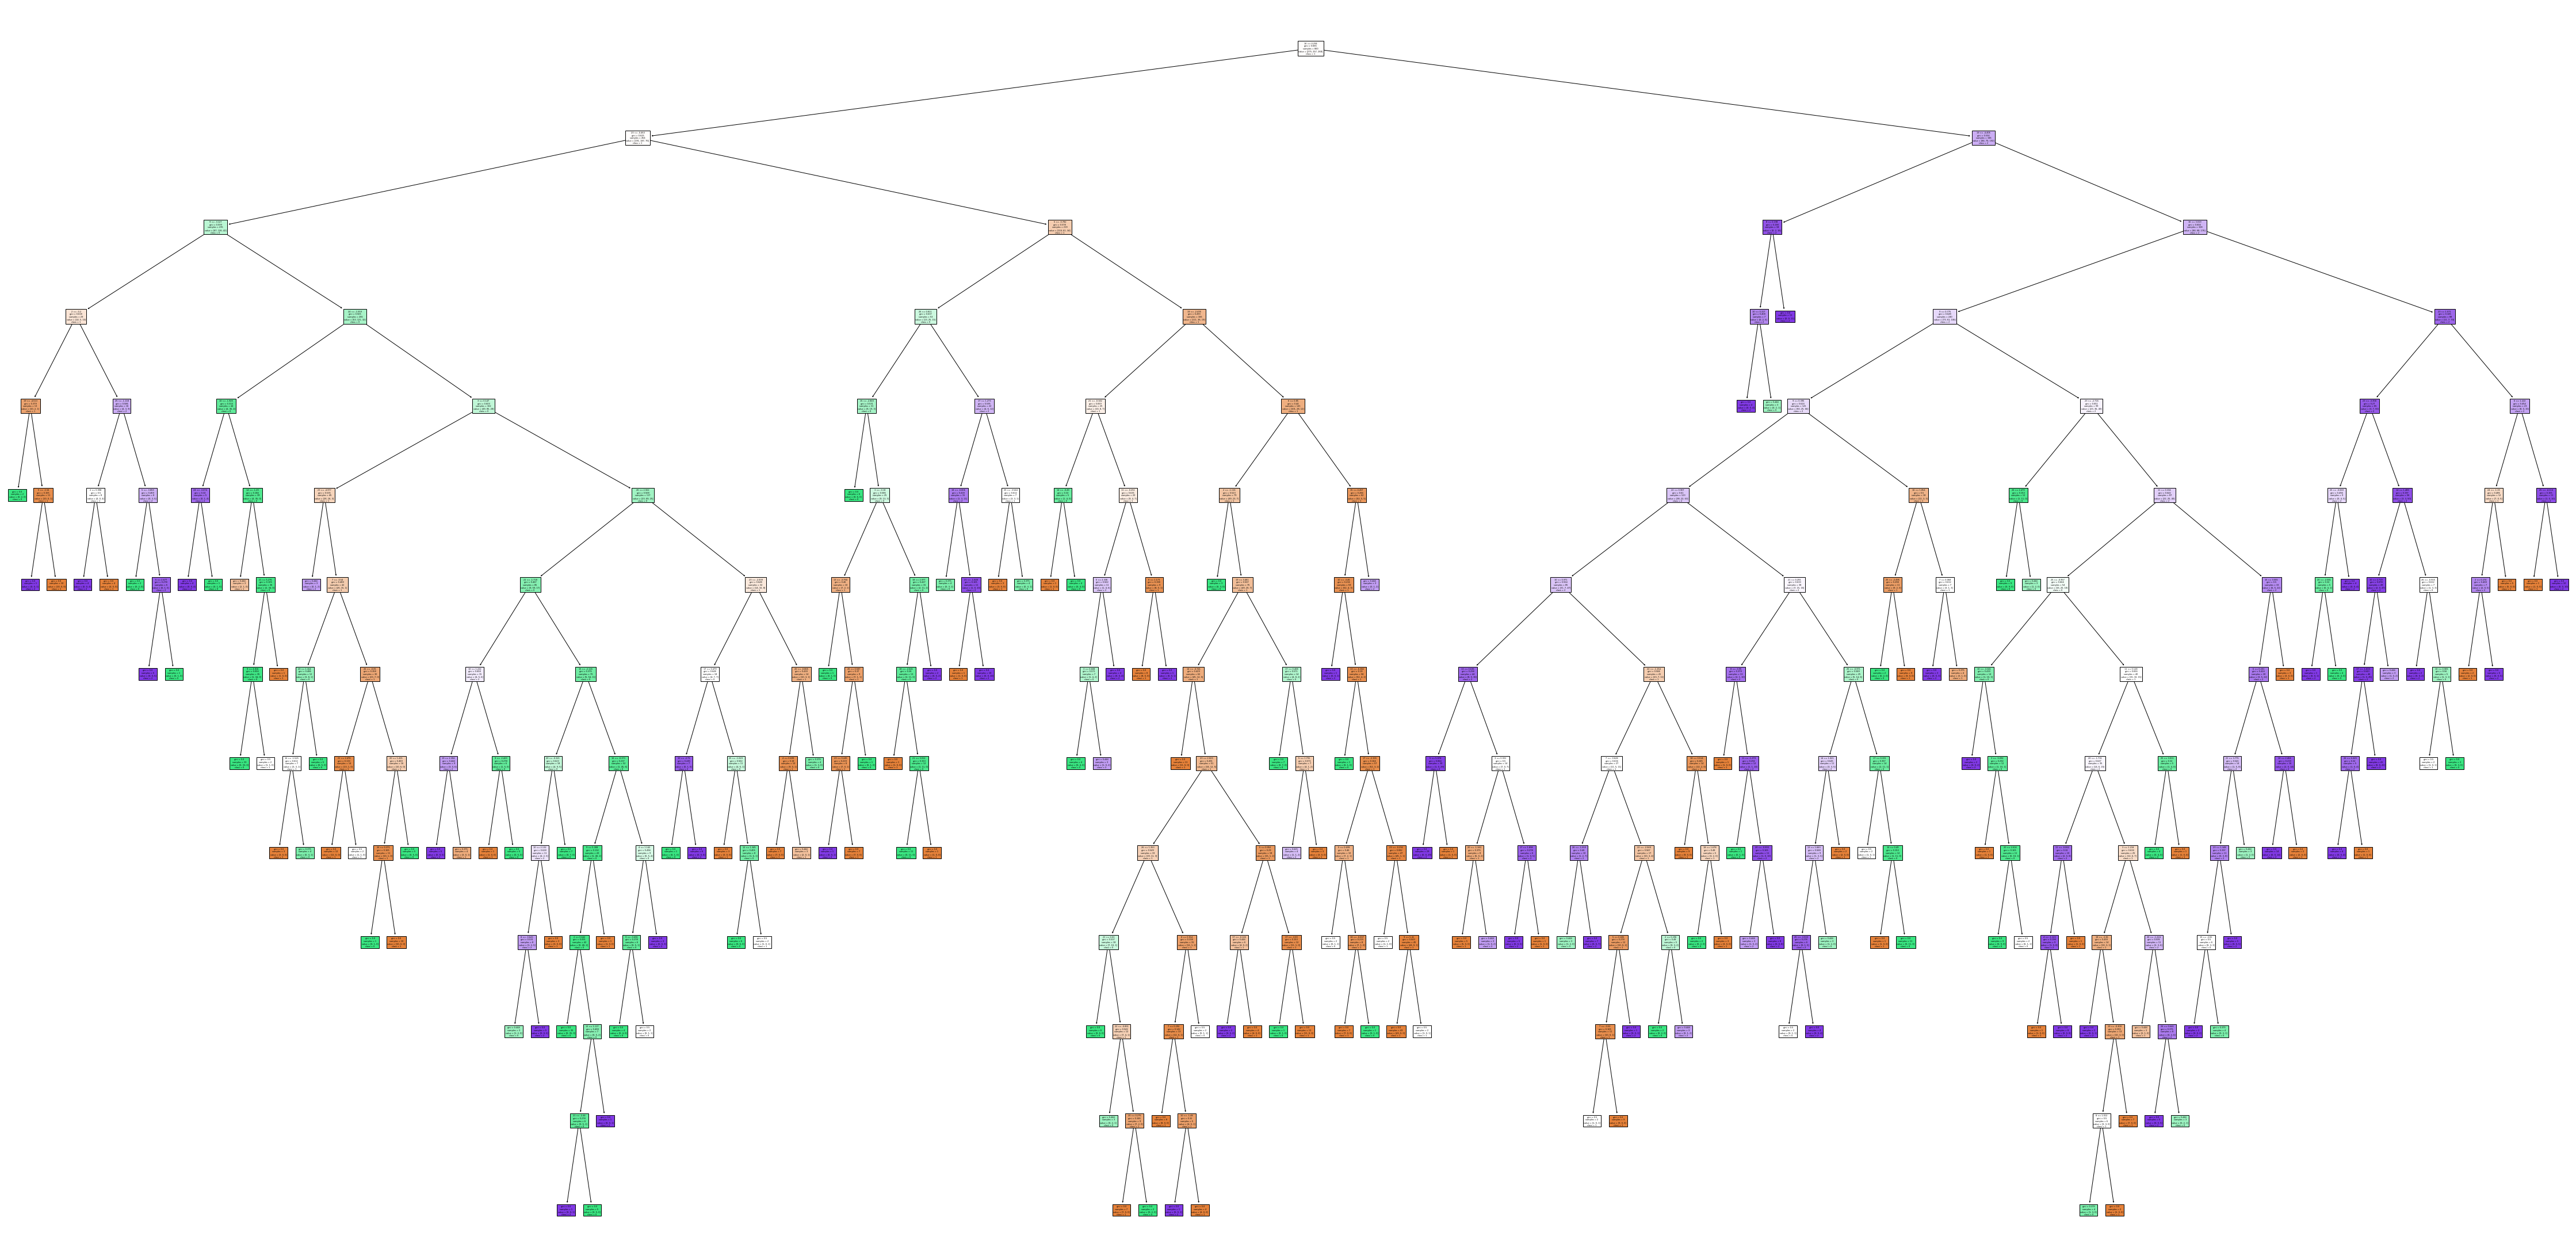

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(best_random.estimators_[0], feature_names = X.columns, class_names=['1', '0', '2'],filled=True)
fig.savefig('rf_individualtree.png')


We plot here on of the tree of our random forest

In [ ]:
rf_best.feature_importances_


array([0.0230637 , 0.05596485, 0.02420001, 0.05879762, 0.03232941,
       0.0244501 , 0.0241572 , 0.04273921, 0.07725211, 0.02440466,
       0.0240926 , 0.04414927, 0.0238577 , 0.03216448, 0.10556604,
       0.03308538, 0.02783508, 0.0401782 , 0.04432158, 0.03533803,
       0.04033734, 0.04753389, 0.02810107, 0.04019888, 0.0458816 ])

Since we are implementing a random forest, we can rank the features in order of importance. Here below you can find them listed in descending order

In [ ]:
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rf_best.feature_importances_})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
14,16,0.106063
8,10,0.078048
3,5,0.057561
1,3,0.055817
24,26,0.048637
21,23,0.046819
18,20,0.043847
11,13,0.043839
7,9,0.042921
20,22,0.040227


As expected, we don't have any relevant features, since presumably the data are generated from a normal distribution.

#Final Predictions

In [ ]:
df_final = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine learning/mldata_0003145700.TEST_FEATURES.csv") 

In [ ]:
X = df_final.to_numpy()

In [ ]:
final_1 = pd.DataFrame(X)

In [ ]:
final = final_1.iloc[: , 1:]

In [ ]:
final

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,0.655800,-0.044284,0.853253,-1.149433,1.329090,0.336755,0.635440,-0.999437,4.970074,0.076223,...,3.790716,-2.931078,2.438899,1.097560,-0.631658,0.282449,4.126382,-2.931078,-1.810148,0.090308
1,0.907650,0.620824,0.076087,0.633127,2.847981,0.914466,-1.613697,0.403889,-1.047049,-1.285085,...,1.739660,4.471137,3.172982,1.376927,0.737837,-2.447418,2.256025,4.471137,-0.165741,-1.655774
2,0.699865,1.270388,0.834609,-0.200403,0.482206,1.867104,0.239219,-0.135250,-0.425609,-0.313526,...,0.990532,1.280340,1.448746,1.350277,-1.203027,-1.439054,0.412869,1.280340,1.025470,2.033638
3,0.298005,3.121405,-0.205060,-5.511450,-4.600845,-1.087226,0.778586,1.276942,2.528731,-0.031871,...,4.935796,-0.784727,1.152018,3.525362,-2.818766,7.165913,3.152957,-0.784727,-2.188476,0.780441
4,0.516912,-1.140250,1.663895,-1.740338,1.339329,0.489068,-0.321064,1.287530,0.426597,1.345688,...,-2.230821,3.304740,-0.751788,4.970351,0.223990,1.908562,0.149971,3.304740,1.536565,1.251942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.059613,-4.509097,0.409654,0.568819,-1.874285,0.572361,-1.021681,-1.533612,0.718038,-0.645242,...,2.585227,3.178769,-0.908762,-1.700893,0.281140,2.344623,1.054635,3.178769,-0.745348,-1.330673
996,1.317776,-3.738953,-0.797346,-0.783919,1.906613,0.654610,-0.402758,2.042214,0.229729,-0.899370,...,2.999244,-0.764500,0.409038,1.824483,2.014390,-3.240932,2.011049,-0.764500,1.689688,-6.758493
997,-0.062383,-1.094424,1.985034,0.169271,-1.665790,0.212911,0.523971,-2.502868,0.476528,-0.521619,...,1.194140,2.014899,-1.471856,1.741391,0.509964,2.803778,-2.000660,2.014899,3.354566,-1.973475
998,1.011804,4.217103,1.280697,1.985804,1.958369,0.750346,0.313562,2.961732,-2.250047,-0.376027,...,3.023210,-0.610953,1.341294,-0.506084,0.557895,0.922449,2.948987,-0.610953,-1.941797,-1.925857


In [ ]:

names = []
for i in range(2,27):
  names.append(i)
#rename all column names
final.columns = names

#view updated list of column names
final


,2,3,4,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,24,25,26
0,0.655800,-0.044284,0.853253,-1.149433,1.329090,0.336755,0.635440,-0.999437,4.970074,0.076223,...,3.790716,-2.931078,2.438899,1.097560,-0.631658,0.282449,4.126382,-2.931078,-1.810148,0.090308
1,0.907650,0.620824,0.076087,0.633127,2.847981,0.914466,-1.613697,0.403889,-1.047049,-1.285085,...,1.739660,4.471137,3.172982,1.376927,0.737837,-2.447418,2.256025,4.471137,-0.165741,-1.655774
2,0.699865,1.270388,0.834609,-0.200403,0.482206,1.867104,0.239219,-0.135250,-0.425609,-0.313526,...,0.990532,1.280340,1.448746,1.350277,-1.203027,-1.439054,0.412869,1.280340,1.025470,2.033638
3,0.298005,3.121405,-0.205060,-5.511450,-4.600845,-1.087226,0.778586,1.276942,2.528731,-0.031871,...,4.935796,-0.784727,1.152018,3.525362,-2.818766,7.165913,3.152957,-0.784727,-2.188476,0.780441
4,0.516912,-1.140250,1.663895,-1.740338,1.339329,0.489068,-0.321064,1.287530,0.426597,1.345688,...,-2.230821,3.304740,-0.751788,4.970351,0.223990,1.908562,0.149971,3.304740,1.536565,1.251942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.059613,-4.509097,0.409654,0.568819,-1.874285,0.572361,-1.021681,-1.533612,0.718038,-0.645242,...,2.585227,3.178769,-0.908762,-1.700893,0.281140,2.344623,1.054635,3.178769,-0.745348,-1.330673
996,1.317776,-3.738953,-0.797346,-0.783919,1.906613,0.654610,-0.402758,2.042214,0.229729,-0.899370,...,2.999244,-0.764500,0.409038,1.824483,2.014390,-3.240932,2.011049,-0.764500,1.689688,-6.758493
997,-0.062383,-1.094424,1.985034,0.169271,-1.665790,0.212911,0.523971,-2.502868,0.476528,-0.521619,...,1.194140,2.014899,-1.471856,1.741391,0.509964,2.803778,-2.000660,2.014899,3.354566,-1.973475
998,1.011804,4.217103,1.280697,1.985804,1.958369,0.750346,0.313562,2.961732,-2.250047,-0.376027,...,3.023210,-0.610953,1.341294,-0.506084,0.557895,0.922449,2.948987,-0.610953,-1.941797,-1.925857


In [ ]:
y_pred = sv_fin.predict(final)

In [ ]:
y_pred

In [ ]:
with open('svm_fin.txt', 'w') as f:
    for item in y_pred:
        f.write("%s\n" % item)


In [ ]:
y_rf_fin= best_random.predict(final)

In [ ]:
y_rf_fin

array([0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1,
       1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0,
       1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2,
       2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0,
       0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1,

In [ ]:
with open('y_rf_fin.txt', 'w') as f:
    for item in y_pred:
        f.write("%s\n" % item)


#CONCLUSIONS

We implemented different types of classifier. If we would run one of the two classifiers proposed by the project, we would use a Random Forest Classifier, constructed in this way:
RandomForestClassifier(bootstrap=False, min_samples_split = 5, n_estimators=1400) and all the other parameters as default, since we obtained with it a 78.5% accuracy against a 70.5% accuracy for the linear SVM. Instead, exploring a bit more the  SVM classifier, through a RandomizedGridSearch we obtained a 88.5% accuracy! I thus decided to use this classifier for the predictions. Precisely, we have constructed the Svm with the following parameters:
 SVC{'C': 22.589811271799878, 'gamma': 0.020242130426907784, 'kernel': 'rbf'}, and other as default.

 Besides that, we can conclude analyzing a bit the general framework. Our dataset wasn't one of the cleanest, and since from the start we didn't distinguish a clear difference of clusters depending on the labels. We thus expected that we wouldn't perform perfectly on our test set. An important thing was the tuning of the parameters: playing with them first, and then running some hyperparameters tuning techniques definitely helped to improve the performance of our classifier. This happened in all the cases, but in particular we have seen that the RandomizedGridSearch led us to a better increase of performance. Beside that, we for sure have to mention that our parameter search was not one of the more sophisticated. Due to technical/time/computational constraints it was important to do a trade-off between an extensive search of the parameters and a reasonable amount of calculations we would have performed. For this reasone I tried to tune the parameters that I considered more important and crucials in the increasing of our performance, leaving a bit of space for maybe some imprecision and approximation. 

Moreover, given that the best classifier was not included, I will upload both the solution for the best classifier that was suggested ( Random classifier in our case) and for the non-linear SVM
I hope you enjoyed the notebook and found it interesting!